In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [50]:
from PIML.util.util import Util
from PIML.method.evalrbf import EvalRBF

In [45]:
e = EvalRBF()

#1798 R=10000.01
Building RBF with gaussan kernel on data shape (5880, 1798)


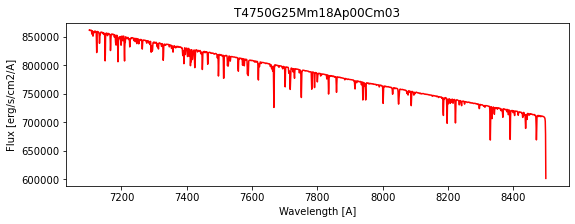

In [49]:
Ws = [7100, 8500]; R="G"; Res=5000;step=1;
e.init(Ws,R, Res,step, onPCA=0)

In [57]:
Util.PhyTick

[0.25, 250, 0.5, 0.25, 0.25]

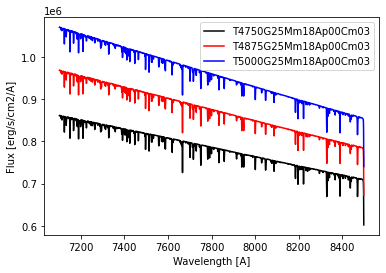

In [64]:
pmt2 = e.PhyMid + [0,250,0,0,0]
e.test_rbf(e.PhyMid, pmt2)

In [129]:
from scipy.interpolate import LinearNDInterpolator,NearestNDInterpolator,interpn

In [67]:
e.pdx0

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 2],
       ...,
       [6, 6, 4, 5, 1],
       [6, 6, 4, 5, 2],
       [6, 6, 4, 5, 3]])

In [69]:
e.flux.shape

(5880, 1798)

In [131]:
LND = LinearNDInterpolator(e.pdx0, e.flux)
NND = NearestNDInterpolator(e.pdx0, e.flux)

In [ ]:
interpn

In [82]:
pmt = e.PhyMid + [0,250//2,0,0,0]
pmt1 = e.PhyMid

In [77]:
pdx = e.pmt2pdx_scaler(pmt)

In [80]:
flux_RBF = e.rbf_flux(pmt)

In [89]:
flux_LND=LND(pdx)[0]

In [86]:
wave = e.wave

In [112]:
pmt = Util.get_random_uniform(1, 5, e.minmax_rescaler, method="rand")[0]

In [113]:
pmt

array([-2.15753909e+00,  4.21774644e+03,  2.00961915e+00,  1.86527484e-01,
        3.12051726e-01])

In [140]:
idx1, idx2 = np.argsort(abs(e.para  - pmt).sum(1))[:2]
pmt_Teff = np.copy(pmt)
pmt_Teff[1] = 4000
idx2 = np.argsort(abs(e.para  - pmt_Teff).sum(1))[0]


pmt1, flux1=e.para[idx1], e.flux[idx1]
pmt2, flux2=e.para[idx2], e.flux[idx2]

In [ ]:
NearestNDInterpolator

In [130]:
NND = NearestNDInterpolator(e.)

TypeError: __init__() missing 1 required positional argument: 'y'

In [133]:
flux_NND

array([1071400., 1070900., 1071200., ...,  847610.,  825530.,  740470.])

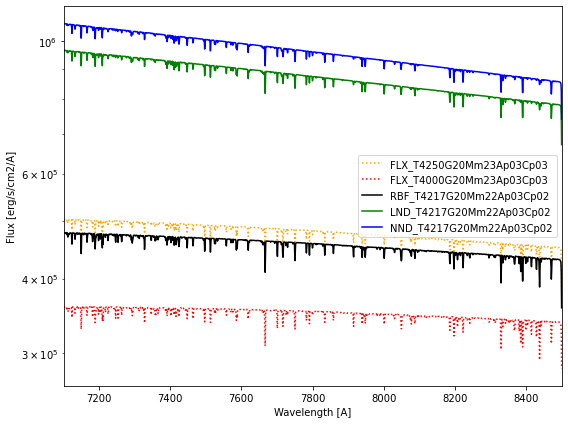

In [149]:
# flux_RBF = e.rbf_flux(pmt)
# flux_LND=LND(pdx)[0]
# flux_NND=NND(pdx)[0]
pmt_name = Util.get_pmt_name(*pmt)
plt.figure(figsize=(8,6),facecolor='w')
plt.plot(wave, flux1, label="FLX_"+Util.get_pmt_name(*pmt1), c='orange', linestyle=":")
plt.plot(wave, flux2, label="FLX_"+Util.get_pmt_name(*pmt2), c='r', linestyle=":")

plt.plot(wave, flux_RBF, label="RBF_" + pmt_name , c='k')
plt.plot(wave, flux_LND, label="LND_" + pmt_name, c='g')
plt.plot(wave, flux_NND, label="NND_" + pmt_name, c='b')

plt.xlabel("Wavelength [A]")
plt.ylabel("Flux [erg/s/cm2/A]")
plt.yscale("log")
# plt.title(pmt_name)
plt.tight_layout()
plt.legend()
plt.xlim(wave[0],wave[-1])
plt.savefig("RBFvsLND.pdf")

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

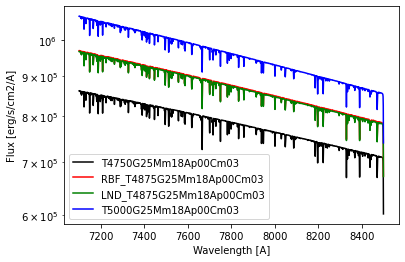

In [108]:
pmt1 = e.PhyMid
pmt = e.PhyMid + 
# pmt2 = e.
flux1, flux2 = e.get_model(pmt1,onGrid=1),  e.get_model(pmt2,onGrid=1)
flux_RBF = e.rbf_flux(pmt)
pmt_name = Util.get_pmt_name(*pmt)
plt.figure(figsize=(6,4), facecolor='w',)
plt.plot(wave, flux1, label=Util.get_pmt_name(*pmt1), c='k')
plt.plot(wave, flux_RBF, label="RBF_" + pmt_name , c='r')
plt.plot(wave, flux_LND, label="LND_" + pmt_name, c='g')

plt.plot(wave, flux2, label=Util.get_pmt_name(*pmt2), c='b')
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux [erg/s/cm2/A]")
plt.yscale("log")
plt.legend()
plt.save

In [71]:
e.pdx0.shape

(5880, 5)